In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import statistics
from math import sqrt
from numpy import log as ln
from tqdm import tqdm
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_f = pd.read_csv("new.csv", index_col = [0])
df_f = df_f.sort_index(axis = 0)

In [ ]:
df_f

,Category,Sub-Category,Sub-Sub-Category,Year,Month,Day,Date,Label,Week_Day
0,Bags and Travel,Men Bags,Backpacks,2023.0,1.0,14.0,2023-01-14 00:00:00,0.053368,Saturday
1,Bags and Travel,Men Bags,Business Bags,2023.0,1.0,14.0,2023-01-14 00:00:00,0.046994,Saturday
2,Bags and Travel,Men Bags,Crossbody Bags,2023.0,1.0,14.0,2023-01-14 00:00:00,0.052711,Saturday
3,Bags and Travel,Men Bags,Messenger Bags,2023.0,1.0,14.0,2023-01-14 00:00:00,0.052596,Saturday
4,Bags and Travel,Men Bags,Wallets & Accessories,2023.0,1.0,14.0,2023-01-14 00:00:00,0.239899,Saturday
...,...,...,...,...,...,...,...,...,...
9570,Bedding & Bath,Bedding,Comforters Quilts & Duvets,2023.0,1.0,30.0,2023-01-30 00:00:00,0.083423,Monday
9571,Bedding & Bath,Bedding,Mattress Protectors,2023.0,1.0,30.0,2023-01-30 00:00:00,0.086780,Monday
9572,Bedding & Bath,Bedding,Pillow Cases,2023.0,1.0,30.0,2023-01-30 00:00:00,0.086593,Monday
9573,Bedding & Bath,Bedding,Pillows & Bolsters,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_f["Week_Day"] = df_f["Week_Day"].replace("Monday", 1)
df_f["Week_Day"] = df_f["Week_Day"].replace("Tuesday", 2)
df_f["Week_Day"] = df_f["Week_Day"].replace("Wednesday", 3)
df_f["Week_Day"] = df_f["Week_Day"].replace("Thursday", 4)
df_f["Week_Day"] = df_f["Week_Day"].replace("Friday", 5)
df_f["Week_Day"] = df_f["Week_Day"].replace("Saturday", 6)
df_f["Week_Day"] = df_f["Week_Day"].replace("Sunday", 7)

In [ ]:
df_f

,Category,Sub-Category,Sub-Sub-Category,Year,Month,Day,Date,Label,Week_Day
0,Bags and Travel,Men Bags,Backpacks,2023.0,1.0,14.0,2023-01-14 00:00:00,0.053368,6.0
1,Bags and Travel,Men Bags,Business Bags,2023.0,1.0,14.0,2023-01-14 00:00:00,0.046994,6.0
2,Bags and Travel,Men Bags,Crossbody Bags,2023.0,1.0,14.0,2023-01-14 00:00:00,0.052711,6.0
3,Bags and Travel,Men Bags,Messenger Bags,2023.0,1.0,14.0,2023-01-14 00:00:00,0.052596,6.0
4,Bags and Travel,Men Bags,Wallets & Accessories,2023.0,1.0,14.0,2023-01-14 00:00:00,0.239899,6.0
...,...,...,...,...,...,...,...,...,...
9570,Bedding & Bath,Bedding,Comforters Quilts & Duvets,2023.0,1.0,30.0,2023-01-30 00:00:00,0.083423,1.0
9571,Bedding & Bath,Bedding,Mattress Protectors,2023.0,1.0,30.0,2023-01-30 00:00:00,0.086780,1.0
9572,Bedding & Bath,Bedding,Pillow Cases,2023.0,1.0,30.0,2023-01-30 00:00:00,0.086593,1.0
9573,Bedding & Bath,Bedding,Pillows & Bolsters,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df_f[df_f['Date'] <= '2023-02-10 00:00:00']
df2 = df_f[df_f['Date'] >= '2023-02-10 00:00:00']

In [ ]:
df = df1

In [ ]:
temp = df[(df['Category'] == "Bags and Travel") & (df['Sub-Category'] == "Men Bags") & (df['Sub-Sub-Category'] == "Business Bags")]

In [ ]:
df = df.drop("Date", axis = 1)

In [ ]:
le_category = LabelEncoder()
le_sub_category = LabelEncoder()
le_sub_sub_category = LabelEncoder()
# le_week_day = LabelEncoder()

df['Category'] = le_category.fit_transform(df['Category'])
df['Sub-Category'] = le_sub_category.fit_transform(df['Sub-Category'])
df['Sub-Sub-Category'] = le_sub_sub_category.fit_transform(df['Sub-Sub-Category'])
# df['Week_Day'] = le_week_day.fit_transform(df['Week_Day'])

X = df.copy()
y = X.pop('Label')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
dt_r = RandomForestRegressor(random_state = 0)
dt_r.fit(X_train, y_train)
y_pred = dt_r.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE is", mse)

RMSE is 0.001323306029419281


In [ ]:
import pickle
pickle.dump(dt_r, open('model.pkl', 'wb'))

In [ ]:
output = open('cat_encoder.pkl', 'wb')
pickle.dump(le_category, output)

output = open('sub_cat_encoder.pkl', 'wb')
pickle.dump(le_sub_category, output)

output = open('subsub_cat_encoder.pkl', 'wb')
pickle.dump(le_sub_sub_category, output)

# output = open('week_day_encoder.pkl', 'wb')
# pickle.dump(le_week_day, output)

In [ ]:
lists = [
    ['Bags and Travel', 'Men Bags', 'Business Bags', 2023, 2, 11, 'Saturday'],
    ['Bags and Travel', 'Men Bags', 'Business Bags', 2023, 2, 12, 'Sunday'],
    ['Bags and Travel', 'Men Bags', 'Business Bags', 2023, 2, 13, 'Monday'],
    ['Bags and Travel', 'Men Bags', 'Business Bags', 2023, 2, 14, 'Tuesday'],
    ['Bags and Travel', 'Men Bags', 'Business Bags', 2023, 2, 15, 'Wednesday'],
    ['Bags and Travel', 'Men Bags', 'Business Bags', 2023, 2, 16, 'Thursday'],
    ['Bags and Travel', 'Men Bags', 'Business Bags', 2023, 2, 17, 'Friday'],
]

indices_to_transform = [0, 1, 2]

for lst in lists:
    for i in indices_to_transform:
        if i == 0:
            lst[i] = le_category.transform([lst[i]])[0]
        elif i == 1:
            lst[i] = le_sub_category.transform([lst[i]])[0]
        elif i == 2:
            lst[i] = le_sub_sub_category.transform([lst[i]])[0]

In [ ]:
predictions = []
for i in range(len(lists)):
  predictions.append(dt_r.predict([lists[i]]))
predictions = [float(arr[0]) for arr in predictions]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not h

In [ ]:
date_list = temp['Date'].tolist()
last_date = datetime.strptime('2023-02-10', '%Y-%m-%d')
for i in range(1, 8):
    new_date = last_date + timedelta(days=i)
    date_str = new_date.strftime('%Y-%m-%d %H:%M:%S')
    date_list.append(date_str)

In [ ]:
#new = pd.read_csv("new.csv", index_col = [0])
new = df2
new.sort_index()
#temp2 = new[(new['Category'] == "Bags and Travel") & (new['Sub-Category'] == "Men Bags") & (new['Sub-Sub-Category'] == "Business Bags")]

,Category,Sub-Category,Sub-Sub-Category,Year,Month,Day,Date,Label,Week_Day
16044,Bags and Travel,Men Bags,Backpacks,2023,2,10,2023-02-10 00:00:00,0.045529,Friday
16045,Bags and Travel,Men Bags,Business Bags,2023,2,10,2023-02-10 00:00:00,0.021819,Friday
16046,Bags and Travel,Men Bags,Crossbody Bags,2023,2,10,2023-02-10 00:00:00,0.046257,Friday
16047,Bags and Travel,Men Bags,Messenger Bags,2023,2,10,2023-02-10 00:00:00,0.042982,Friday
16048,Bags and Travel,Men Bags,Wallets & Accessories,2023,2,10,2023-02-10 00:00:00,0.227586,Friday
...,...,...,...,...,...,...,...,...,...
20589,Watches Sunglasses Jewellery,Eyewear,Men,2023,2,17,2023-02-17 00:00:00,0.052848,Friday
20590,Watches Sunglasses Jewellery,Eyewear,Sunglasses,2023,2,17,2023-02-17 00:00:00,0.323654,Friday
20591,Watches Sunglasses Jewellery,Jewellery,Men,2023,2,17,2023-02-17 00:00:00,0.027595,Friday
20592,Watches Sunglasses Jewellery,Jewellery,Women,2023,2,17,2023-02-17 00:00:00,0.027175,Friday


In [ ]:
temp2 = df_f[(df_f['Category'] == "Bags and Travel") & (df_f['Sub-Category'] == "Men Bags") & (df_f['Sub-Sub-Category'] == "Business Bags")]

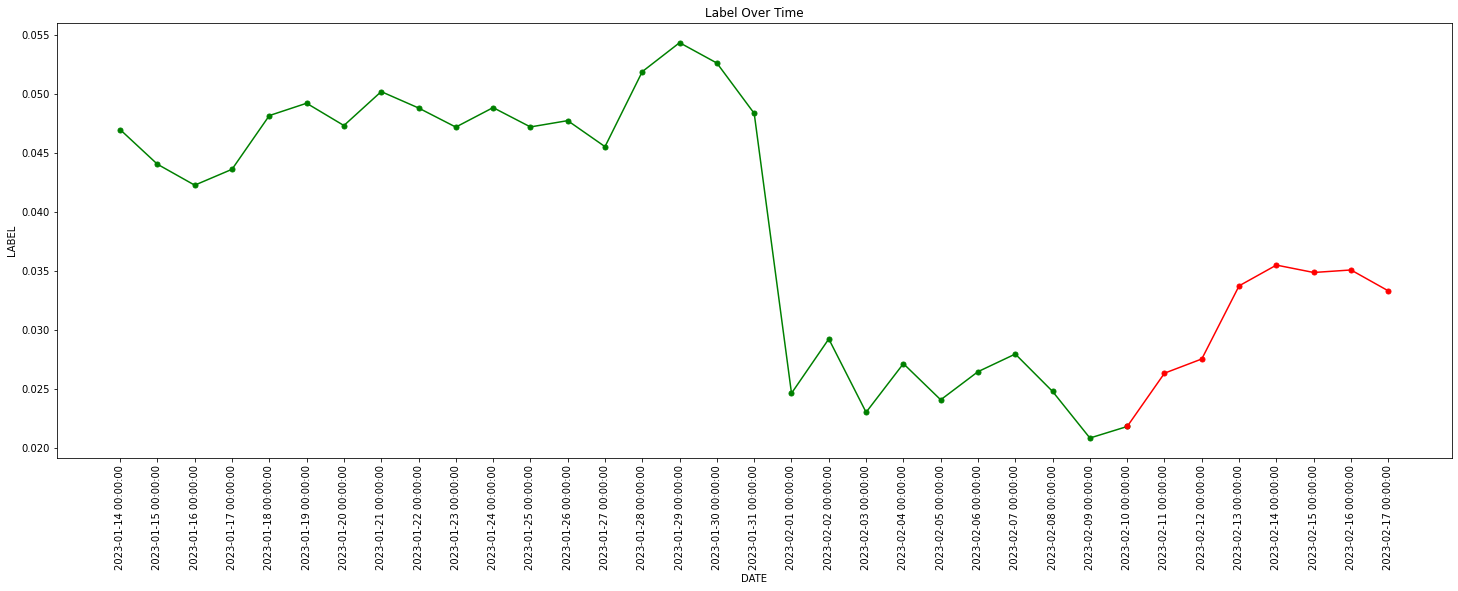

In [ ]:
x = date_list
y = temp['Label'].tolist() + predictions
split_index = len(temp['Label'])

x1, x2 = x[:split_index], x[split_index - 1:]
y1, y2 = y[:split_index], y[split_index - 1:]

plt.figure(figsize=(25, 8))
plt.plot(x1, y1, marker = '.', markersize = 10, color = 'green')
plt.plot(x2, y2, marker = '.', markersize = 10, color = 'red')

plt.title('Label Over Time')
plt.xlabel('DATE')
plt.ylabel('LABEL')
plt.xticks(rotation = 90) 
plt.show()

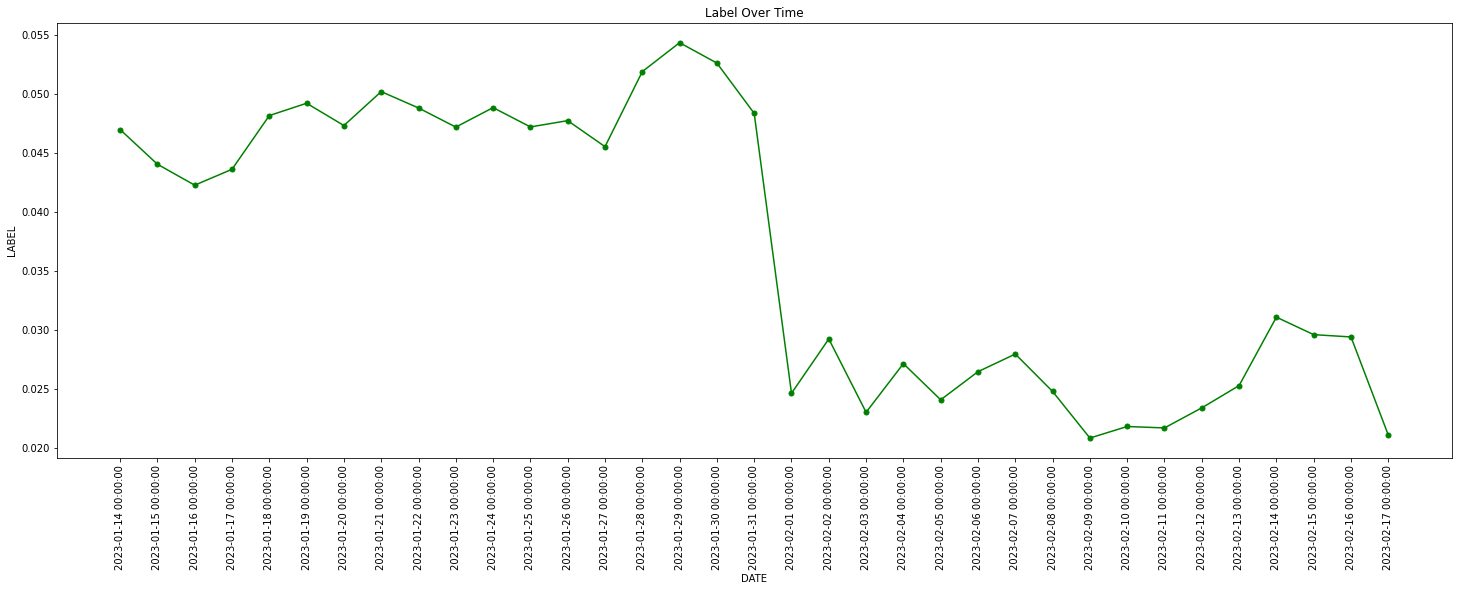

In [ ]:
x1 = temp2["Date"]
y1 = temp2["Label"]

plt.figure(figsize=(25, 8))
plt.plot(x1, y1, marker = '.', markersize = 10, color = 'green')

plt.title('Label Over Time')
plt.xlabel('DATE')
plt.ylabel('LABEL')
plt.xticks(rotation = 90) 
plt.show()

In [ ]:
rand_sample = np.random.randint(0, 5000)
sample = np.array(X_test.iloc[rand_sample]).reshape(1, -1)
y_pred = dt_r.predict(sample)
print(f"Actual: {y_test.iloc[rand_sample]}\tPred: {y_pred}")

Actual: 0.1182066236629384	Pred: [0.12796642]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
